In [2]:
import pandas as pd
from scripts.aux_msa_functions import *
import time
from scipy.spatial.distance import cdist
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

In [44]:
# "data/msa-{msa_type}-simulations/MSA-1b/static-context/{context_size}/{fam}/{fam}-{sim_ind}.fasta"
# "data/msa-{msa_type}-simulations/MSA-1b/dynamic-context/{context_size}/{context_sampling}/{fam}/{fam}-{sim_ind}.fasta"

context_type = "static"
proposal_type = "msa_prob_dist"
msa_type = "seed"
context_size = 20
context_sampling = "greedy"
fam = "PF00004"
sim_ind = 5


diagnostics_folder = "./diagnostics/"

if context_type == "dynamic":
    diagnostics_folder += f"msa-{msa_type}-simulations/MSA-1b/{proposal_type}-proposal/dynamic-context/{context_size}/{context_sampling}/{fam}/{sim_ind}"
elif context_type == "static":
    diagnostics_folder += f"msa-{msa_type}-simulations/MSA-1b/{proposal_type}-proposal/static-context/{context_size}/{fam}/{sim_ind}"

if proposal_type == "random":
    mean_proposal_probs = np.load(os.path.join(diagnostics_folder,"mean_proposal_probs.npy"))
    n_mutations = np.load(os.path.join(diagnostics_folder,"n_mutations.npy"))
    hamming_distances = np.load(os.path.join(diagnostics_folder,"hamming_distances.npy"))
    n_proposals = np.load(os.path.join(diagnostics_folder,"n_proposals.npy"))
    mean_accepted_proposal_probs = np.load(os.path.join(diagnostics_folder,"mean_accepted_proposal_probs.npy"))

    diagnostics_df = pd.DataFrame({"mean_proposal_probs":mean_proposal_probs, "n_mutations":n_mutations,
                               "n_proposals":n_proposals, "hamming_distances":hamming_distances, 
                               "mean_accepted_proposal_probs":mean_accepted_proposal_probs})
elif proposal_type == "msa_prob_dist":
    mean_proposal_probs = np.load(os.path.join(diagnostics_folder,"mean_proposal_probs.npy"))
    n_mutations = np.load(os.path.join(diagnostics_folder,"n_mutations.npy"))
    hamming_distances = np.load(os.path.join(diagnostics_folder,"hamming_distances.npy"))
    diagnostics_df = pd.DataFrame({"mean_proposal_probs":mean_proposal_probs,"n_mutations":n_mutations, "hamming_distances":hamming_distances})
    

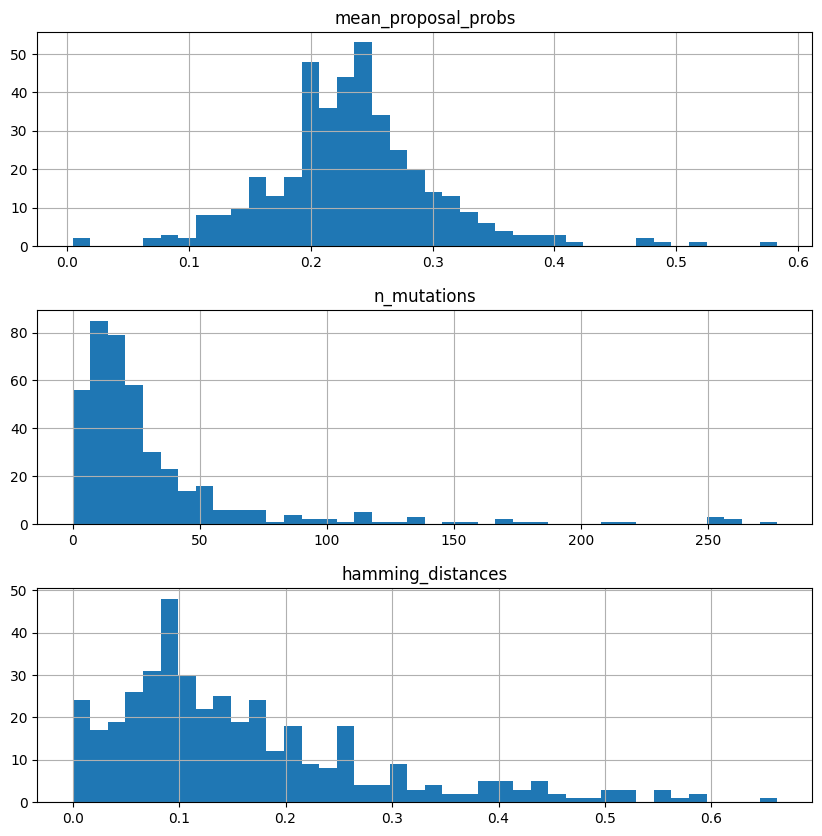

In [45]:

if proposal_type == "random":     
    fig, axes = plt.subplots(nrows=5,ncols = 1, figsize = (10,15))

    diagnostics_df.hist("mean_proposal_probs",bins = 40, ax = axes[0])
    diagnostics_df.hist("n_mutations",bins = 40, ax = axes[1])
    diagnostics_df.hist("n_proposals",bins = 40, ax = axes[2])
    diagnostics_df.hist("hamming_distances", bins = 40, ax = axes[3])
    diagnostics_df.hist("mean_accepted_proposal_probs", bins = 40, ax = axes[4])
    
elif proposal_type == "msa_prob_dist":
    
    fig, axes = plt.subplots(nrows=3,ncols = 1, figsize = (10,10))
    diagnostics_df.hist("mean_proposal_probs",bins = 40, ax = axes[0])
    diagnostics_df.hist("n_mutations",bins = 40, ax = axes[1])
    diagnostics_df.hist("hamming_distances",bins = 40, ax = axes[2])

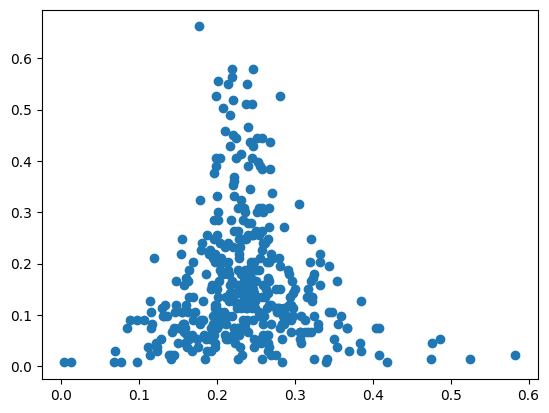

In [49]:
plt.scatter(diagnostics_df["mean_proposal_probs"], diagnostics_df["hamming_distances"])

In [51]:
diagnostics_df["n_mutations"].sum()

13321

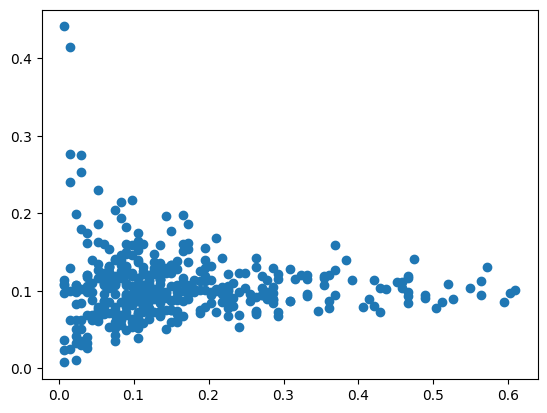

In [40]:
plt.scatter(diagnostics_df["hamming_distances"], diagnostics_df["mean_accepted_proposal_probs"])